### Initial attempt to join the different datasets

Notes: Need to resolve how to deal with different seasons that have different scores/release dates/ genre. 
- Pick the farthest date?
- Average scores?
- Most occuring Genre?

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import RocCurveDisplay, recall_score, precision_score, roc_curve, roc_auc_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import matplotlib as mpl

In [177]:
main=pd.read_csv('all-weeks-global.csv')
movies=pd.read_csv('bestmovies.csv')
shows=pd.read_csv('bestshows.csv')
globai=pd.read_csv('whatwewatch.csv')
type(globai)

pandas.core.frame.DataFrame

In [178]:
main['is_staggered_launch']=main['Unnamed: 9']


In [179]:
def strip_season(title):
    return title.split(': Season')[0].strip()

globai['Title'] = globai['Title'].apply(strip_season)

In [180]:
# globai=globai.groupby('Title')[['Title','Available Globally?','Release Date']]


In [181]:
globai

,Unnamed: 0,Title,Available Globally?,Release Date,Hours Viewed,Unnamed: 5
0,NaN,The Night Agent,Yes,2023-03-23,"812,100,000",NaN
1,NaN,Ginny & Georgia,Yes,2023-01-05,"665,100,000",NaN
2,NaN,The Glory,Yes,2022-12-30,"622,800,000",NaN
3,NaN,Wednesday,Yes,2022-11-23,"507,700,000",NaN
4,NaN,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"503,000,000",NaN
...,...,...,...,...,...,...
18209,NaN,راس السنة,No,NaN,"100,000",NaN
18210,NaN,心が叫びたがってるんだ。,No,NaN,"100,000",NaN
18211,NaN,두근두근 내 인생,No,NaN,"100,000",NaN
18212,NaN,라디오 스타,No,NaN,"100,000",NaN


In [182]:
main=main[['week', 'category','show_title', 'weekly_hours_viewed', 'runtime', 'weekly_views', 'cumulative_weeks_in_top_10', 'is_staggered_launch']]
globai=globai[['Title','Available Globally?','Release Date']].set_index('Title')
shows=shows[['TITLE','MAIN_GENRE','SCORE','NUMBER_OF_VOTES', 'MAIN_PRODUCTION', 'NUMBER_OF_SEASONS' ]].set_index('TITLE')
movies=movies[['TITLE','MAIN_GENRE','SCORE','NUMBER_OF_VOTES', 'MAIN_PRODUCTION' ]].set_index('TITLE')

showsmovies = pd.concat([shows, movies], axis=0)

In [183]:
showsmovies

,MAIN_GENRE,SCORE,NUMBER_OF_VOTES,MAIN_PRODUCTION,NUMBER_OF_SEASONS
TITLE,,,,,
Breaking Bad,drama,9.5,1727694,US,5.0
Avatar: The Last Airbender,scifi,9.3,297336,US,3.0
Our Planet,documentary,9.3,41386,GB,1.0
Kota Factory,drama,9.3,66985,IN,2.0
The Last Dance,documentary,9.1,108321,US,1.0
...,...,...,...,...,...
The Trip,comedy,6.9,19706,NO,NaN
The Dirt,drama,6.9,47603,US,NaN
Top Gun,drama,6.9,329656,US,NaN


In [184]:
new=main.join(globai, on='show_title', how='left')
new2=new.join(showsmovies, on='show_title', how='left')
new2

,week,category,show_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,Available Globally?,Release Date,MAIN_GENRE,SCORE,NUMBER_OF_VOTES,MAIN_PRODUCTION,NUMBER_OF_SEASONS
0,2024-03-24,Films (English),Irish Wish,40000000,1.5667,25500000.0,2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-03-24,Films (English),Damsel,35700000,1.8333,19500000.0,3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-03-24,Films (English),Shooter,11700000,2.0833,5600000.0,5,False,No,2016-11-16,war,7.5,35547.0,US,3.0
2,2024-03-24,Films (English),Shooter,11700000,2.0833,5600000.0,5,False,No,2016-11-16,thriller,7.2,329417.0,US,NaN
2,2024-03-24,Films (English),Shooter,11700000,2.0833,5600000.0,5,False,No,2018-06-22,war,7.5,35547.0,US,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5717,2021-07-04,TV (Non-English),Elite,10140000,NaN,NaN,1,False,Yes,2020-03-13,NaN,NaN,NaN,NaN,NaN
5717,2021-07-04,TV (Non-English),Elite,10140000,NaN,NaN,1,False,Yes,2021-06-18,NaN,NaN,NaN,NaN,NaN
5718,2021-07-04,TV (Non-English),Katla,9190000,NaN,NaN,1,False,Yes,2021-06-17,NaN,NaN,NaN,NaN,NaN
5719,2021-07-04,TV (Non-English),Record of Ragnarok,9140000,NaN,NaN,1,False,No,2023-01-26,NaN,NaN,NaN,NaN,NaN


In [185]:
print(f"Out of {new2.shape[0]} total points, if we drop all with missing data, \
we'll have {new2.dropna().shape[0]} points (or {new2.dropna().shape[0]/new2.shape[0]} \
of the original dataset)")

Out of 8319 total points, if we drop all with missing data, we'll have 192 points (or 0.02307969707897584 of the original dataset)


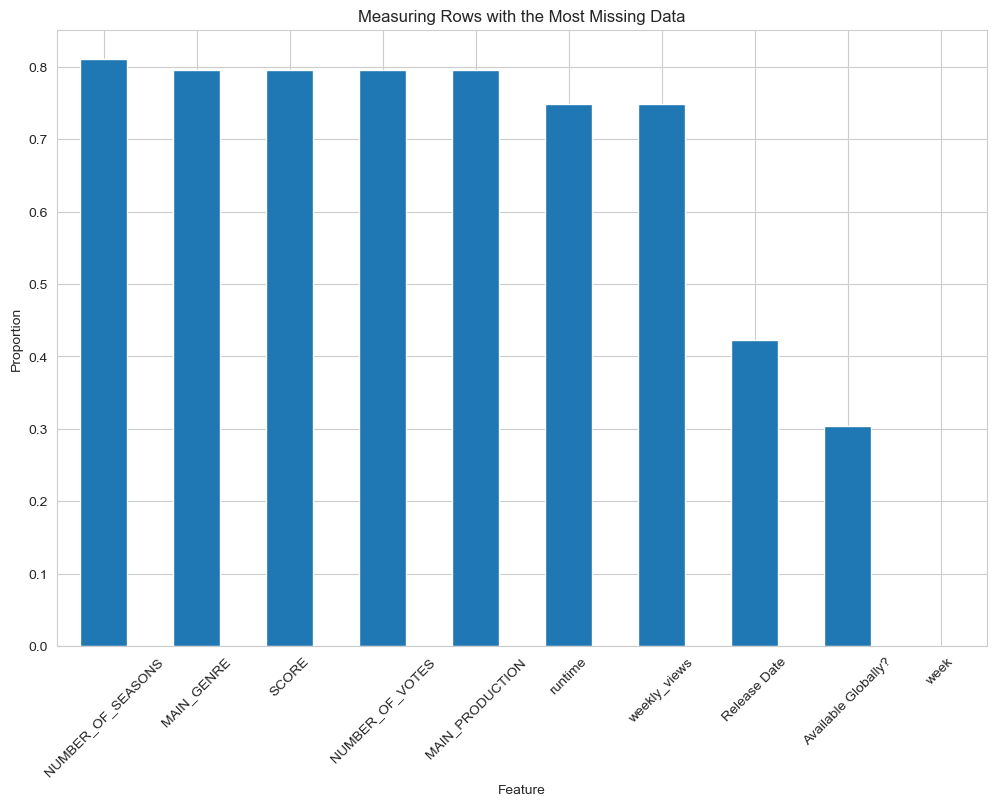

In [186]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
missing_vals = new2.isna().sum()/new2.shape[0]
missing_vals = missing_vals.sort_values(ascending=False)[0:10]
ax = missing_vals.plot(kind='bar')

ax.set_title('Measuring Rows with the Most Missing Data')
ax.set_ylabel('Proportion')
ax.set_xlabel('Feature')
ax.tick_params(axis='x', rotation=45)

^^ Number of seasons is probably high because movies have an Nan
- replace with 0?
  
Investigate further why weekly_views and runtime are high if these come from the main dataset
